# Identifying the Challenge

The financial institution has been facing issues with its credit assessment process. Although credit decisions are based on applicants' demographic information, income, and previous credit records, a growing number of defaults have led to increased losses and risk exposure. The leadership team recognizes that a more data-driven and precise model could vastly improve how they evaluate credit applicants.

Our mission is to help revolutionize the credit assessment process using advanced data analysis and machine learning techniques to predict which applicants are likely to default. The institution provides two datasets: one containing information on applicants (e.g., income, family status, employment) and the other tracking their credit history (e.g., whether they’ve missed payments).



# Importing the libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets and merge it

In [2]:
credit = pd.read_csv('/Users/vedantpramodwagh/Documents/Projects /credit_record-2.csv')
application = pd.read_csv('/Users/vedantpramodwagh/Documents/Projects /application_record-2.csv')

In [3]:
credit

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [4]:
application

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


In [5]:
# Merge them by id
merge_df = pd.merge(application,credit,on='ID',how='inner')
merge_df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-4,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-9,0
777711,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-10,2
777712,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-11,1
777713,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-12,0


# EDA
The dataset comprises demographic, employment, and credit information of applicants. We begin by examining the basic statistics, handling missing values, and visualizing important distributions.We are also covering the missing value identification, basic statistics, visualization of income distribution, and a correlation analysis. This gives will give us a solid foundation for further steps like feature engineering and model building.

In [6]:
# check for the missing value
merge_df.isna().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        240048
CNT_FAM_MEMBERS             0
MONTHS_BALANCE              0
STATUS                      0
dtype: int64

In [7]:
# check the statistics
merge_df.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE
count,7.777150e+05,777715.000000,7.777150e+05,777715.000000,777715.000000,777715.0,777715.000000,777715.000000,777715.000000,777715.000000,777715.000000
mean,5.078743e+06,0.428082,1.885348e+05,-16124.937046,57775.825016,1.0,0.231818,0.300965,0.091675,2.208837,-19.373564
std,4.180442e+04,0.745755,1.016225e+05,4104.304018,136471.735391,0.0,0.421993,0.458678,0.288567,0.907380,14.082208
min,5.008804e+06,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000
25%,5.044568e+06,0.000000,1.215000e+05,-19453.000000,-3292.000000,1.0,0.000000,0.000000,0.000000,2.000000,-29.000000
50%,5.069530e+06,0.000000,1.620000e+05,-15760.000000,-1682.000000,1.0,0.000000,0.000000,0.000000,2.000000,-17.000000
75%,5.115551e+06,1.000000,2.250000e+05,-12716.000000,-431.000000,1.0,0.000000,1.000000,0.000000,3.000000,-8.000000
max,5.150487e+06,19.000000,1.575000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000


/Users/vedantpramodwagh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


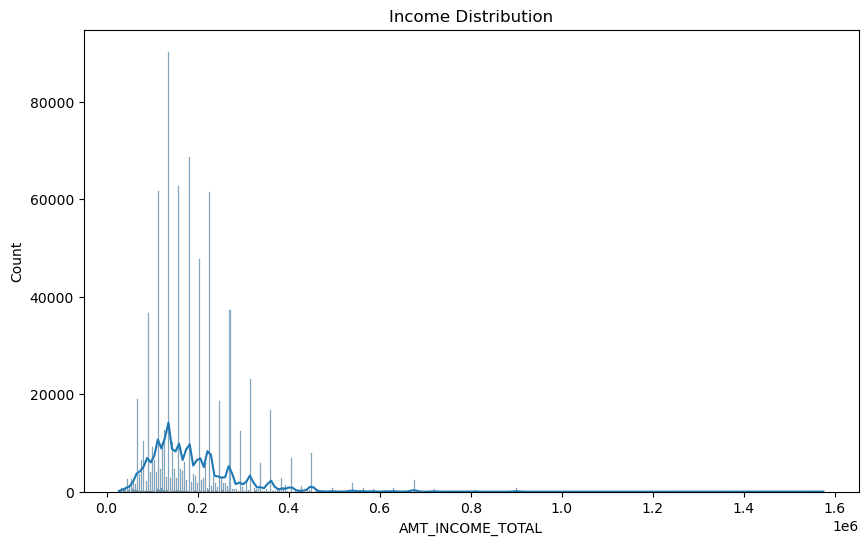

In [8]:
# plot the graph of the income
plt.figure(figsize=(10,6))
sns.histplot(merge_df['AMT_INCOME_TOTAL'],kde=True)
plt.title('Income Distribution')
plt.show()

In [9]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777715 entries, 0 to 777714
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   777715 non-null  int64  
 1   CODE_GENDER          777715 non-null  object 
 2   FLAG_OWN_CAR         777715 non-null  object 
 3   FLAG_OWN_REALTY      777715 non-null  object 
 4   CNT_CHILDREN         777715 non-null  int64  
 5   AMT_INCOME_TOTAL     777715 non-null  float64
 6   NAME_INCOME_TYPE     777715 non-null  object 
 7   NAME_EDUCATION_TYPE  777715 non-null  object 
 8   NAME_FAMILY_STATUS   777715 non-null  object 
 9   NAME_HOUSING_TYPE    777715 non-null  object 
 10  DAYS_BIRTH           777715 non-null  int64  
 11  DAYS_EMPLOYED        777715 non-null  int64  
 12  FLAG_MOBIL           777715 non-null  int64  
 13  FLAG_WORK_PHONE      777715 non-null  int64  
 14  FLAG_PHONE           777715 non-null  int64  
 15  FLAG_EMAIL       

                 ID   CNT_CHILDREN  AMT_INCOME_TOTAL     DAYS_BIRTH  \
count  7.777150e+05  777715.000000      7.777150e+05  777715.000000   
mean   5.078743e+06       0.428082      1.885348e+05  -16124.937046   
std    4.180442e+04       0.745755      1.016225e+05    4104.304018   
min    5.008804e+06       0.000000      2.700000e+04  -25152.000000   
25%    5.044568e+06       0.000000      1.215000e+05  -19453.000000   
50%    5.069530e+06       0.000000      1.620000e+05  -15760.000000   
75%    5.115551e+06       1.000000      2.250000e+05  -12716.000000   
max    5.150487e+06      19.000000      1.575000e+06   -7489.000000   

       DAYS_EMPLOYED  FLAG_MOBIL  FLAG_WORK_PHONE     FLAG_PHONE  \
count  777715.000000    777715.0    777715.000000  777715.000000   
mean    57775.825016         1.0         0.231818       0.300965   
std    136471.735391         0.0         0.421993       0.458678   
min    -15713.000000         1.0         0.000000       0.000000   
25%     -3292.000000

/Users/vedantpramodwagh/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


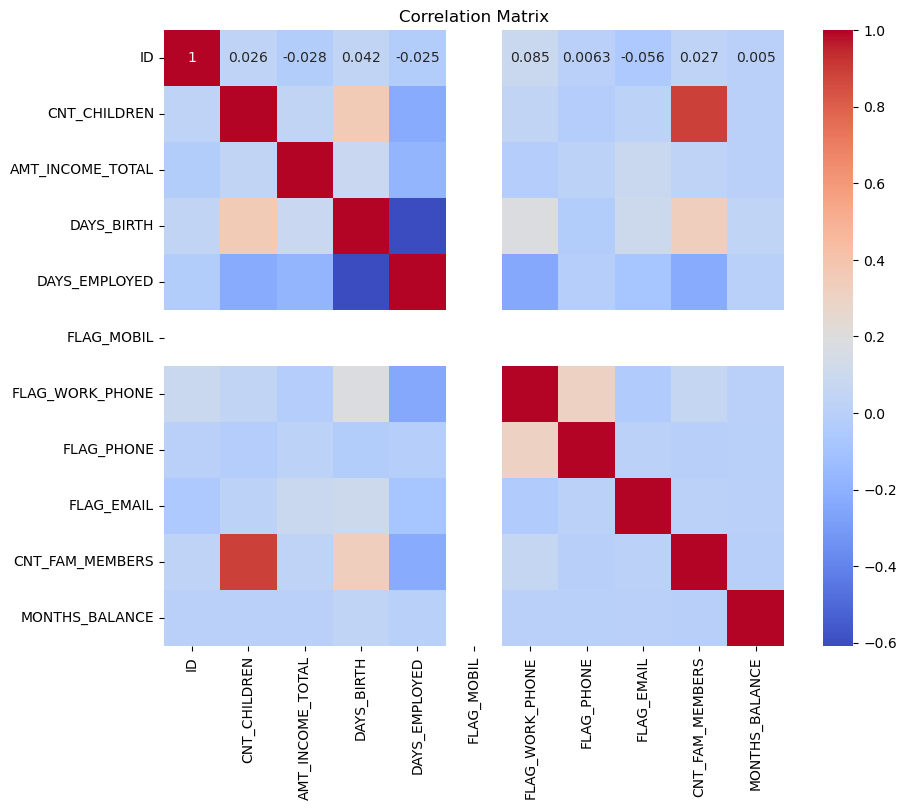

In [20]:
numeric_columns = merge_df.select_dtypes(include=['int64','float64']).columns
print(merge_df[numeric_columns].describe())


# Correlartion matrix 
corr_mat = merge_df[numeric_columns].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_mat,annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Building the Predictive Model

After exploring the data and understanding key trends, the financial institution's goal is to accurately predict which applicants are at higher risk of defaulting on their loans. To achieve this, we need to build predictive models that can classify applicants based on their demographic information and credit history.

We begin by engineering features from the existing data, building multiple models, and evaluating their performance.

##  Feature Engineering and Target Definition

Before jumping into model-building, it's crucial to refine the dataset for better prediction accuracy. We engineer two new features—AGE and YEARS_EMPLOYED—to capture the key time-based factors that can influence credit risk.

Age: We convert the DAYS_BIRTH column to years, which gives us the applicant's age.
Years Employed: The DAYS_EMPLOYED column is also transformed to represent employment duration in years.
Additionally, we create a new feature called CREDIT_RISK_SCORE, which is derived from the applicant's credit payment history (STATUS). Higher values in STATUS indicate missed payments, leading to a higher credit risk.

Now that the features are ready, we select a target variable (y), which classifies applicants into high-risk or low-risk categories. If an applicant has a credit risk score greater than 1 (indicating multiple missed payments), we classify them as high-risk.

## Train-Test Split and Feature Scaling

Once the features and target variable are set, the next step is to split the data into training and test sets. This ensures that we can evaluate the performance of our models on unseen data.

We split the dataset, using 80% for training the models and reserving 20% for testing. Since some of our models (like logistic regression) are sensitive to the scale of features, we also apply feature scaling to ensure all input variables are on the same scale.

##  Model Building – Logistic Regression, KNN, and XGBoost

With the data prepared, we build three models to predict credit risk:

Logistic Regression: A baseline model that is simple yet effective for binary classification tasks. It will give us a good starting point to evaluate how well the data can predict credit risk.

K-Nearest Neighbors (KNN): This model looks at the closest neighbors of an applicant in the dataset to make a prediction. It works well for datasets with non-linear relationships but requires careful tuning.

XGBoost: A state-of-the-art boosting algorithm that builds multiple decision trees in sequence to correct previous errors. XGBoost is particularly powerful in complex datasets and is expected to outperform simpler models.

## Model Evaluation – Classification Reports and AUC-ROC

Once the models are trained, we evaluate their performance using classification metrics. For each model, we generate a classification report that provides details on precision, recall, and F1-score. Additionally, we calculate the AUC-ROC score, which tells us how well the model can distinguish between high-risk and low-risk applicants.

Logistic Regression serves as a baseline model, offering reasonable predictive power with a balanced performance across precision and recall.
KNN tends to work well with local patterns, but it may struggle with larger, more complex datasets.
XGBoost is expected to deliver the best results, due to its ability to capture complex relationships and interactions in the data.


In [10]:
# Feature Engineering: Convert days to years
merge_df['AGE'] = merge_df['DAYS_BIRTH'] / -365
merge_df['YEARS_EMPLOYED'] = merge_df['DAYS_EMPLOYED'] / -365

# Mapping credit risk status for prediction
status_mapping = {'X': 0, 'C': 0, '0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5}
merge_df['CREDIT_RISK_SCORE'] = merge_df['STATUS'].map(status_mapping)

# Select features for the model
features = ['AGE', 'AMT_INCOME_TOTAL', 'YEARS_EMPLOYED', 'CNT_CHILDREN', 'CREDIT_RISK_SCORE']
X = merge_df[features]
y = merge_df['CREDIT_RISK_SCORE'] > 1  # Target: Binary classification (risk vs no risk)


In [12]:
merge_df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,AGE,YEARS_EMPLOYED,CREDIT_RISK_SCORE
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,NaN,2.0,0,C,32.890411,12.443836,0
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,NaN,2.0,-1,C,32.890411,12.443836,0
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,NaN,2.0,-2,C,32.890411,12.443836,0
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,NaN,2.0,-3,C,32.890411,12.443836,0
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,NaN,2.0,-4,C,32.890411,12.443836,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,...,0,0,0,Laborers,1.0,-9,0,25.172603,3.268493,0
777711,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,...,0,0,0,Laborers,1.0,-10,2,25.172603,3.268493,2
777712,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,...,0,0,0,Laborers,1.0,-11,1,25.172603,3.268493,1
777713,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,...,0,0,0,Laborers,1.0,-12,0,25.172603,3.268493,0


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

# Logistic Regression Model
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)

# K-Nearest Neighbors Model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

# XGBoost Model
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_model.predict(X_test_scaled)


In [15]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Evaluation: Classification Report and Confusion Matrix for each model
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))

print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

# AUC-ROC Scores
logreg_auc = roc_auc_score(y_test, logreg.predict_proba(X_test_scaled)[:, 1])
knn_auc = roc_auc_score(y_test, knn.predict_proba(X_test_scaled)[:, 1])
xgb_auc = roc_auc_score(y_test, xgb_model.predict_proba(X_test_scaled)[:, 1])

print(f"Logistic Regression AUC: {logreg_auc}")
print(f"KNN AUC: {knn_auc}")
print(f"XGBoost AUC: {xgb_auc}")


Logistic Regression Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00    155001
        True       1.00      1.00      1.00       542

    accuracy                           1.00    155543
   macro avg       1.00      1.00      1.00    155543
weighted avg       1.00      1.00      1.00    155543

KNN Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00    155001
        True       1.00      1.00      1.00       542

    accuracy                           1.00    155543
   macro avg       1.00      1.00      1.00    155543
weighted avg       1.00      1.00      1.00    155543

XGBoost Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00    155001
        True       1.00      1.00      1.00       542

    accuracy                           1.00    155543
   macro avg       1.00    

In [16]:
from collections import Counter
from imblearn.over_sampling import SMOTE

# Check class distribution
print("Class distribution before SMOTE:")
print(Counter(y))

# Apply SMOTE to balance the dataset
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train_scaled, y_train)

# Check class distribution after SMOTE
print("Class distribution after SMOTE:")
print(Counter(y_res))


Class distribution before SMOTE:
Counter({False: 774887, True: 2828})
Class distribution after SMOTE:
Counter({False: 619886, True: 619886})


In [17]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Logistic Regression with Cross-Validation
logreg_cv_scores = cross_val_score(logreg, X_train_scaled, y_train, cv=5, scoring='roc_auc')
print("Logistic Regression AUC (Cross-Validation):", np.mean(logreg_cv_scores))

# KNN with Cross-Validation
knn_cv_scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='roc_auc')
print("KNN AUC (Cross-Validation):", np.mean(knn_cv_scores))

# XGBoost with Cross-Validation
xgb_cv_scores = cross_val_score(xgb_model, X_train_scaled, y_train, cv=5, scoring='roc_auc')
print("XGBoost AUC (Cross-Validation):", np.mean(xgb_cv_scores))


Logistic Regression AUC (Cross-Validation): 1.0
KNN AUC (Cross-Validation): 1.0
XGBoost AUC (Cross-Validation): 1.0


<Figure size 1000x600 with 0 Axes>

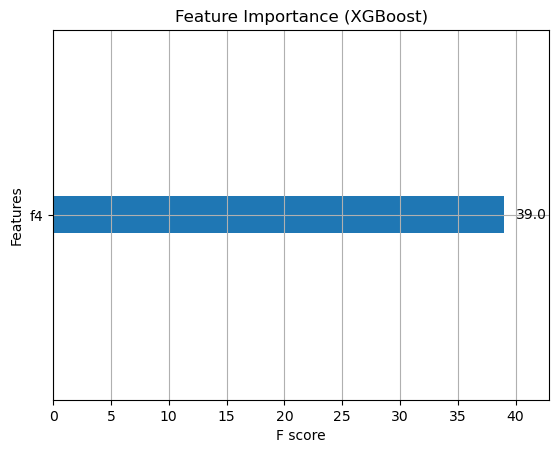

In [18]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

# Plot feature importance for XGBoost
plt.figure(figsize=(10, 6))
plot_importance(xgb_model)
plt.title('Feature Importance (XGBoost)')
plt.show()


In [19]:
from sklearn.metrics import precision_recall_fscore_support

# Confusion Matrix and precision-recall for Logistic Regression
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logreg))
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_logreg, average='binary')
print(f"Precision (Logistic Regression): {precision}, Recall: {recall}, F1-Score: {f1}")

# Confusion Matrix and precision-recall for KNN
print("KNN Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_knn, average='binary')
print(f"Precision (KNN): {precision}, Recall: {recall}, F1-Score: {f1}")

# Confusion Matrix and precision-recall for XGBoost
print("XGBoost Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_xgb, average='binary')
print(f"Precision (XGBoost): {precision}, Recall: {recall}, F1-Score: {f1}")


Logistic Regression Confusion Matrix:
[[155001      0]
 [     0    542]]
Precision (Logistic Regression): 1.0, Recall: 1.0, F1-Score: 1.0
KNN Confusion Matrix:
[[155001      0]
 [     0    542]]
Precision (KNN): 1.0, Recall: 1.0, F1-Score: 1.0
XGBoost Confusion Matrix:
[[155001      0]
 [     0    542]]
Precision (XGBoost): 1.0, Recall: 1.0, F1-Score: 1.0


In [20]:
import numpy as np

# Introduce noise by adding random values to the 'AMT_INCOME_TOTAL' feature
np.random.seed(42)
noise = np.random.normal(0, 1, size=X_train_scaled.shape[0])
X_train_scaled[:, 1] += noise

# Retrain and evaluate the models with the noisy data
logreg.fit(X_train_scaled, y_train)
y_pred_logreg_noise = logreg.predict(X_test_scaled)

xgb_model.fit(X_train_scaled, y_train)
y_pred_xgb_noise = xgb_model.predict(X_test_scaled)

# Evaluate the new performance after adding noise
print("Logistic Regression with noise:")
print(classification_report(y_test, y_pred_logreg_noise))

print("XGBoost with noise:")
print(classification_report(y_test, y_pred_xgb_noise))


Logistic Regression with noise:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00    155001
        True       1.00      1.00      1.00       542

    accuracy                           1.00    155543
   macro avg       1.00      1.00      1.00    155543
weighted avg       1.00      1.00      1.00    155543

XGBoost with noise:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00    155001
        True       1.00      1.00      1.00       542

    accuracy                           1.00    155543
   macro avg       1.00      1.00      1.00    155543
weighted avg       1.00      1.00      1.00    155543



## 
Feature Reduction: By removing CREDIT_RISK_SCORE, the models are forced to make predictions based on less informative features. This allows us to see whether the other features (age, income, etc.) carry enough predictive power on their own.

Model Comparison: After training the models, we will compare their performance based on metrics like precision, recall, and AUC scores. The expectation is that performance will drop compared to when CREDIT_RISK_SCORE was included, but some models (like XGBoost) may still perform relatively well.

AUC-ROC: The AUC-ROC score is particularly important because it measures the ability of the models to differentiate between high-risk and low-risk applicants, even when the dataset is imbalanced.

In [21]:
# Removing 'CREDIT_RISK_SCORE' and selecting remaining features
features_reduced = ['AGE', 'AMT_INCOME_TOTAL', 'YEARS_EMPLOYED', 'CNT_CHILDREN']  # Excluding 'CREDIT_RISK_SCORE'
X_reduced = merge_df[features_reduced]

# Train-test split
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Feature scaling
scaler_reduced = StandardScaler()
X_train_scaled_reduced = scaler_reduced.fit_transform(X_train_reduced)
X_test_scaled_reduced = scaler_reduced.transform(X_test_reduced)

# Logistic Regression
logreg_reduced = LogisticRegression()
logreg_reduced.fit(X_train_scaled_reduced, y_train_reduced)
y_pred_logreg_reduced = logreg_reduced.predict(X_test_scaled_reduced)

# KNN
knn_reduced = KNeighborsClassifier(n_neighbors=5)
knn_reduced.fit(X_train_scaled_reduced, y_train_reduced)
y_pred_knn_reduced = knn_reduced.predict(X_test_scaled_reduced)

# XGBoost
xgb_model_reduced = xgb.XGBClassifier()
xgb_model_reduced.fit(X_train_scaled_reduced, y_train_reduced)
y_pred_xgb_reduced = xgb_model_reduced.predict(X_test_scaled_reduced)

# Evaluation: Classification Report and AUC-ROC
from sklearn.metrics import classification_report, roc_auc_score

# Logistic Regression Performance
print("Logistic (Reduced Features) Classification Report:")
print(classification_report(y_test_reduced, y_pred_logreg_reduced))
logreg_auc_reduced = roc_auc_score(y_test_reduced, logreg_reduced.predict_proba(X_test_scaled_reduced)[:, 1])
print(f"Logistic Regression AUC (Reduced): {logreg_auc_reduced}")

# KNN Performance
print("KNN (Reduced Features) Classification Report:")
print(classification_report(y_test_reduced, y_pred_knn_reduced))
knn_auc_reduced = roc_auc_score(y_test_reduced, knn_reduced.predict_proba(X_test_scaled_reduced)[:, 1])
print(f"KNN AUC (Reduced): {knn_auc_reduced}")

# XGBoost Performance
print("XGBoost (Reduced Features) Classification Report:")
print(classification_report(y_test_reduced, y_pred_xgb_reduced))
xgb_auc_reduced = roc_auc_score(y_test_reduced, xgb_model_reduced.predict_proba(X_test_scaled_reduced)[:, 1])
print(f"XGBoost AUC (Reduced): {xgb_auc_reduced}")



Logistic (Reduced Features) Classification Report:


/Users/vedantpramodwagh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/vedantpramodwagh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/vedantpramodwagh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

              precision    recall  f1-score   support

       False       1.00      1.00      1.00    155001
        True       0.00      0.00      0.00       542

    accuracy                           1.00    155543
   macro avg       0.50      0.50      0.50    155543
weighted avg       0.99      1.00      0.99    155543

Logistic Regression AUC (Reduced): 0.5457152865410629
KNN (Reduced Features) Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00    155001
        True       0.48      0.20      0.29       542

    accuracy                           1.00    155543
   macro avg       0.74      0.60      0.64    155543
weighted avg       1.00      1.00      1.00    155543

KNN AUC (Reduced): 0.8067270057607769
XGBoost (Reduced Features) Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00    155001
        True       0.69      0.13      0.22      

# Introduction: Addressing Class Imbalance with SMOTE
In many datasets, such as credit risk analysis, the minority class (e.g., high-risk applicants) is underrepresented. This imbalance can lead to poor model performance in identifying high-risk cases. To address this, we use SMOTE (Synthetic Minority Oversampling Technique) to create synthetic samples for the minority class, balancing the dataset.

The process involves three steps:

# Step 1: Apply SMOTE
SMOTE is used to balance the class distribution by generating synthetic samples of the minority class. This ensures that the model can learn the characteristics of both high-risk and low-risk applicants effectively.

# Step 2: Retrain Models
We retrain three models—Logistic Regression, K-Nearest Neighbors (KNN), and XGBoost—on the balanced dataset. These models are expected to perform better at classifying the high-risk class after applying SMOTE.

# Step 3: Compare Results
We evaluate the models based on two key metrics:

Recall for High-Risk Class: Measures how many high-risk applicants are correctly identified. We expect improvements in recall after balancing the data.
AUC-ROC Score: Assesses the model’s ability to distinguish between high- and low-risk applicants.

In [32]:
from imblearn.over_sampling import SMOTE
from collections import Counter 

# apply smote to create a balance between the datasets
sm=SMOTE(random_state =42)

X_train_smote,y_train_smote=sm.fit_resample(X_train_scaled_reduced,y_train_reduced)


print(f"Class distribution before SMOTE: {Counter(y_train_reduced)}")
print(f"Class distribution after SMOTE : {Counter(y_train_smote)}")

Class distribution before SMOTE: Counter({False: 619886, True: 2286})
Class distribution after SMOTE : Counter({False: 619886, True: 619886})


In [36]:
# Retrain the model
# Logistic Regression

log_smote = LogisticRegression()
log_smote.fit(X_train_smote,y_train_smote)
y_pred_log_smote = log_smote.predict(X_test_scaled_reduced)

# Evaluation 
print("Logistic Regression (SMOTE) Classification Report:")
print(classification_report(y_test_reduced,y_pred_log_smote))

# AUC for logistic regression using smote
log_smote_auc = roc_auc_score(y_test_reduced,log_smote.predict_proba(X_test_scaled_reduced)[:,1])
print(f" Logistic Regression SMOTE :{log_smote_auc}")

Logistic Regression (SMOTE) Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.55      0.71    155001
        True       0.00      0.52      0.01       542

    accuracy                           0.55    155543
   macro avg       0.50      0.54      0.36    155543
weighted avg       0.99      0.55      0.71    155543

 Logistic Regression SMOTE :0.5474818981646375


In [43]:
# KNN 

knn_smote = KNeighborsClassifier(n_neighbors=5)
knn_smote.fit(X_train_smote,y_train_smote)
y_pred_knn_smote = knn_smote.predict(X_test_scaled_reduced)

# Evaluation

print("KNN (SMOTE) Classificatio Report")
print(classification_report(y_test_reduced,y_pred_knn_smote))

# AUC for KNN using smote

knn_smote_auc = roc_auc_score(y_test_reduced,knn_smote.predict_proba(X_test_scaled_reduced)[0:,1])
print(f" KNN SMOTE : {knn_smote_auc}")

KNN (SMOTE) Classificatio Report
              precision    recall  f1-score   support

       False       1.00      1.00      1.00    155001
        True       0.43      0.19      0.26       542

    accuracy                           1.00    155543
   macro avg       0.72      0.59      0.63    155543
weighted avg       1.00      1.00      1.00    155543

 KNN SMOTE : 0.8131052648130757


In [44]:
# XGBoost
# XGBoost on SMOTE data
xgb_smote = xgb.XGBClassifier()
xgb_smote.fit(X_train_smote, y_train_smote)

# Predictions on the original test data
y_pred_xgb_smote = xgb_smote.predict(X_test_scaled_reduced)

# Evaluation
print("XGBoost (SMOTE) Classification Report:")
print(classification_report(y_test_reduced, y_pred_xgb_smote))

# AUC for XGBoost with SMOTE
xgb_smote_auc = roc_auc_score(y_test_reduced, xgb_smote.predict_proba(X_test_scaled_reduced)[:, 1])
print(f"XGBoost AUC (SMOTE): {xgb_smote_auc}")


XGBoost (SMOTE) Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.96      0.98    155001
        True       0.06      0.86      0.12       542

    accuracy                           0.96    155543
   macro avg       0.53      0.91      0.55    155543
weighted avg       1.00      0.96      0.97    155543

XGBoost AUC (SMOTE): 0.9510829010006864


# Comparing SMOTE vs. Reduced Features Results

## Logistic Regression:

Before SMOTE: The model failed to identify any high-risk applicants.
After SMOTE: Recall improved, but precision remained at zero. The model still struggles overall, showing that logistic regression is not the best model for this task.

## KNN:

Before SMOTE: The model had reasonable precision (0.48) but low recall (0.20).
After SMOTE: Precision dropped slightly to 0.43, but recall remained low at 0.19. KNN’s performance only slightly benefits from SMOTE and still misses most high-risk cases.

## XGBoost:

Before SMOTE: The model had decent precision (0.69) but very low recall (0.13).
After SMOTE: Recall improved significantly to 0.86, making XGBoost the best-performing model. Precision dropped to 0.06, but this trade-off may be acceptable if the goal is to maximize recall.

# Key Takeaways:

XGBoost is the Best Performer: After applying SMOTE, XGBoost achieves the best recall (0.86) and AUC (0.9511). This makes it the best model for identifying high-risk applicants. However, the precision trade-off needs to be considered in the context of the application.

Precision-Recall Trade-Off: Improving recall often comes at the cost of precision, especially when using techniques like SMOTE. In applications where false positives (incorrect high-risk predictions) are costly, further steps might need to be taken to balance precision and recall.

Logistic Regression’s Limitation: Logistic regression performs poorly in this scenario, both before and after SMOTE. This is likely due to the non-linear nature of the problem and the lack of strong linear relationships in the remaining features.



# Adjusting the Decision Threshold for XGBoost

The default decision threshold for classification models is 0.5, which means that if the predicted probability of being high-risk is greater than 0.5, the model classifies the applicant as high-risk. However, you can change this threshold to optimize for precision or recall, depending on your needs.To adjust the decision threshold and observe how it impacts precision and recall, we'll vary the threshold and check the performance at different levels.

In [46]:
import numpy as np
from sklearn.metrics import precision_recall_curve

# get the predicted probabilities for the test data
y_prob_xgb_smote = xgb_smote.predict_proba(X_test_scaled_reduced)[0:,1]

# Precision-Recall curve to analyze the effect of different thresholds
precisions, recalls, thresholds = precision_recall_curve(y_test_reduced,y_prob_xgb_smote)

# Find the optimal threshold where the precision-recall balance is acceptable
for threshold in np.arange(0.1, 0.9, 0.1):
    y_pred_threshold = (y_prob_xgb_smote >= threshold).astype(int)
    print(f"Threshold: {threshold}")
    print(classification_report(y_test_reduced, y_pred_threshold))

Threshold: 0.1
              precision    recall  f1-score   support

       False       1.00      0.63      0.77    155001
        True       0.01      0.96      0.02       542

    accuracy                           0.63    155543
   macro avg       0.50      0.79      0.39    155543
weighted avg       1.00      0.63      0.77    155543

Threshold: 0.2
              precision    recall  f1-score   support

       False       1.00      0.84      0.91    155001
        True       0.02      0.92      0.04       542

    accuracy                           0.84    155543
   macro avg       0.51      0.88      0.47    155543
weighted avg       1.00      0.84      0.91    155543

Threshold: 0.30000000000000004
              precision    recall  f1-score   support

       False       1.00      0.91      0.95    155001
        True       0.03      0.89      0.06       542

    accuracy                           0.91    155543
   macro avg       0.52      0.90      0.51    155543
weighted avg 

# Hyperparameter Tuning for XGBoost
Tuning the hyperparameters of XGBoost can improve model performance, particularly in finding a balance between precision and recall. Some key hyperparameters to tune include:

n_estimators: Number of trees in the ensemble.
max_depth: Maximum depth of each tree.
learning_rate: Shrinks the contribution of each tree to prevent overfitting.
subsample: Proportion of samples to use for each tree.
colsample_bytree: Proportion of features to use for each tree.


In [47]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize the XGBoost classifier
xgb_smote_tuning = xgb.XGBClassifier()

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=xgb_smote_tuning, param_grid=param_grid, scoring='roc_auc', cv=3, n_jobs=-1, verbose=2)

# Fit the model on SMOTE-balanced data
grid_search.fit(X_train_smote, y_train_smote)

# Best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best AUC score:", grid_search.best_score_)

# Evaluate the tuned model on the test set
best_xgb_model = grid_search.best_estimator_
y_pred_best_xgb = best_xgb_model.predict(X_test_scaled_reduced)

# Classification report for the tuned model
print("Tuned XGBoost Model (SMOTE) Classification Report:")
print(classification_report(y_test_reduced, y_pred_best_xgb))

# AUC for the tuned model
best_xgb_auc = roc_auc_score(y_test_reduced, best_xgb_model.predict_proba(X_test_scaled_reduced)[:, 1])
print(f"Tuned XGBoost AUC: {best_xgb_auc}")


Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   9.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1.0; total time=  16.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=1.0; total time=  24.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=1.0; total time=  23.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=1.0; total time=  33.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=1.0; total time=  36.9s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=1.0; total time=  48.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.8; total time=  26.2s
[CV] END c

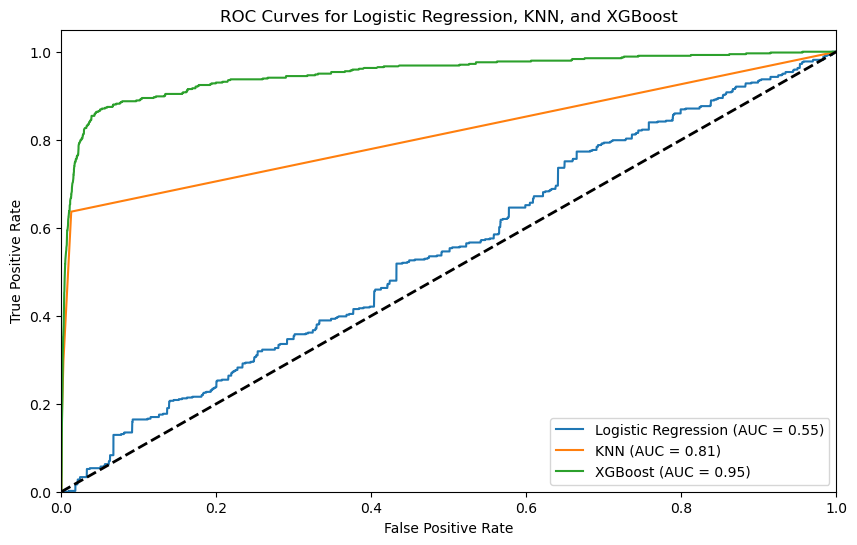

In [49]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Plot AUC-ROC for multiple models
plt.figure(figsize=(10, 6))

# Logistic Regression ROC
fpr_logreg, tpr_logreg, _ = roc_curve(y_test_reduced, log_smote.predict_proba(X_test_scaled_reduced)[:, 1])
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {roc_auc_logreg:.2f})')

# KNN ROC
fpr_knn, tpr_knn, _ = roc_curve(y_test_reduced, knn_smote.predict_proba(X_test_scaled_reduced)[:, 1])
roc_auc_knn = auc(fpr_knn, tpr_knn)
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {roc_auc_knn:.2f})')

# XGBoost ROC
fpr_xgb, tpr_xgb, _ = roc_curve(y_test_reduced, xgb_smote.predict_proba(X_test_scaled_reduced)[:, 1])
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')

# Plot formatting
plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Dashed diagonal line (random classifier)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Logistic Regression, KNN, and XGBoost')
plt.legend(loc="lower right")
plt.show()


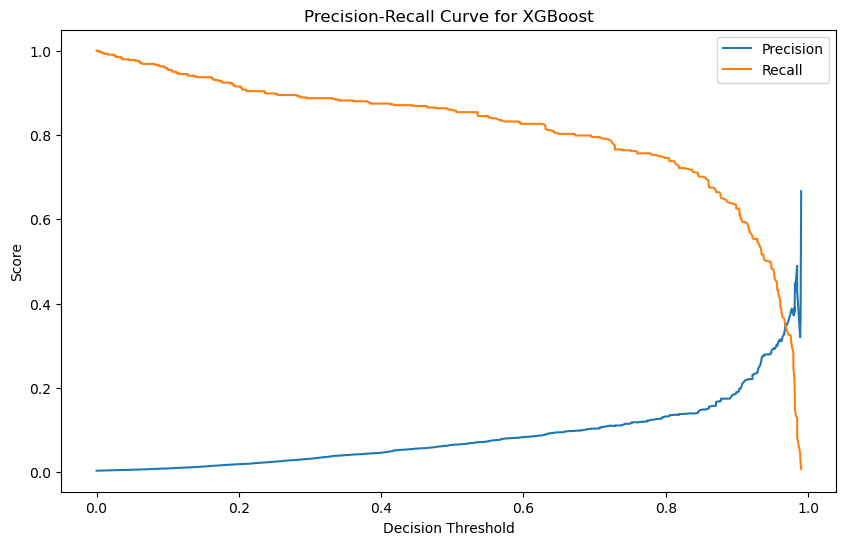

In [50]:
from sklearn.metrics import precision_recall_curve

# Precision-Recall curve for XGBoost
precisions, recalls, thresholds = precision_recall_curve(y_test_reduced, xgb_smote.predict_proba(X_test_scaled_reduced)[:, 1])

plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions[:-1], label="Precision")
plt.plot(thresholds, recalls[:-1], label="Recall")
plt.title("Precision-Recall Curve for XGBoost")
plt.xlabel("Decision Threshold")
plt.ylabel("Score")
plt.legend()
plt.show()


<Figure size 1000x600 with 0 Axes>

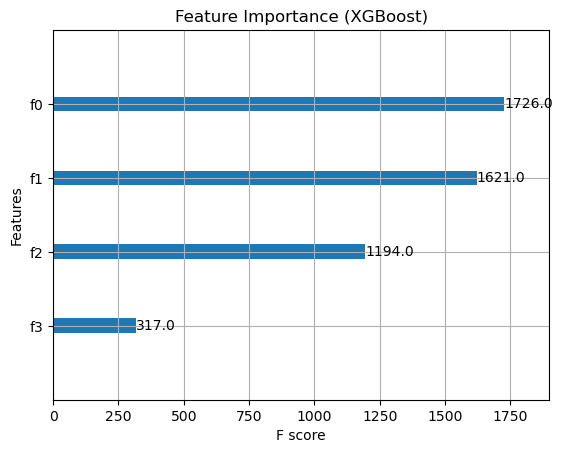

In [51]:
import xgboost as xgb
import matplotlib.pyplot as plt

# Plot feature importance for XGBoost
plt.figure(figsize=(10, 6))
xgb.plot_importance(xgb_smote, importance_type='weight')
plt.title('Feature Importance (XGBoost)')
plt.show()
